# Learning Methods and Models Walkthrough

Welcome! This guided notebook introduces the core ideas behind supervised and unsupervised learning using approachable, hands-on examples. Each section starts with a short explanation of the goal, followed by executable code that you can run cell by cell. The focus is on intuition: what problem are we solving, which model are we using, and how do we interpret the results?

You will practice with classic real-world datasets as well as purposely challenging synthetic data, mirroring the type of visuals that commonly appear in introductory machine learning courses.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import (
    load_diabetes,
    make_blobs,
    make_circles,
    make_classification,
    make_moons,
)
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestClassifier,
    RandomForestRegressor,
)
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from scipy.stats import ttest_rel

plt.rcParams['figure.dpi'] = 120


## How to Navigate This Notebook

- **Read the short context** at the start of each section to understand the goal.
- **Run the code cells in order**; they build on variables defined earlier.
- **Inspect the plots and printed metrics** to see how model behaviour changes.
- **Experiment** by tweaking hyperparameters (tree depth, number of neighbours, etc.) to observe the effect on performance.

## Decision Tree Classification on the Iris Dataset

Decision trees split the feature space into rectangles that lead to simple, human-readable rules ("if sepal width is less than... then predict setosa"). We start with the classic Iris flower dataset and limit ourselves to two features so that the decision boundaries are easy to visualise. The workflow illustrates a typical supervised-learning pipeline: load data, split into train/test sets, scale numeric features, fit the model, and interpret what the model learned.

In [1]:
# Load the Iris dataset and keep the first two features for 2D visualisation
iris = datasets.load_iris()
X_iris = iris.data[:, :2]
y_iris = iris.target

print(f'Shape of feature matrix: {X_iris.shape}')
print(f'Unique class labels: {np.unique(y_iris)}')


NameError: name 'datasets' is not defined

In [3]:
# Split into train/test sets and scale the features
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

scaler_dt = StandardScaler()
X_train_dt = scaler_dt.fit_transform(X_train_dt)
X_test_dt = scaler_dt.transform(X_test_dt)

print(f'Training set size: {X_train_dt.shape[0]} samples')
print(f'Test set size: {X_test_dt.shape[0]} samples')


Training set size: 105 samples
Test set size: 45 samples


In [4]:
# Train and evaluate a Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train_dt, y_train_dt)
accuracy_dtree = dtree.score(X_test_dt, y_test_dt)
print(f'Decision Tree Accuracy: {accuracy_dtree:.2f}')


Decision Tree Accuracy: 0.73


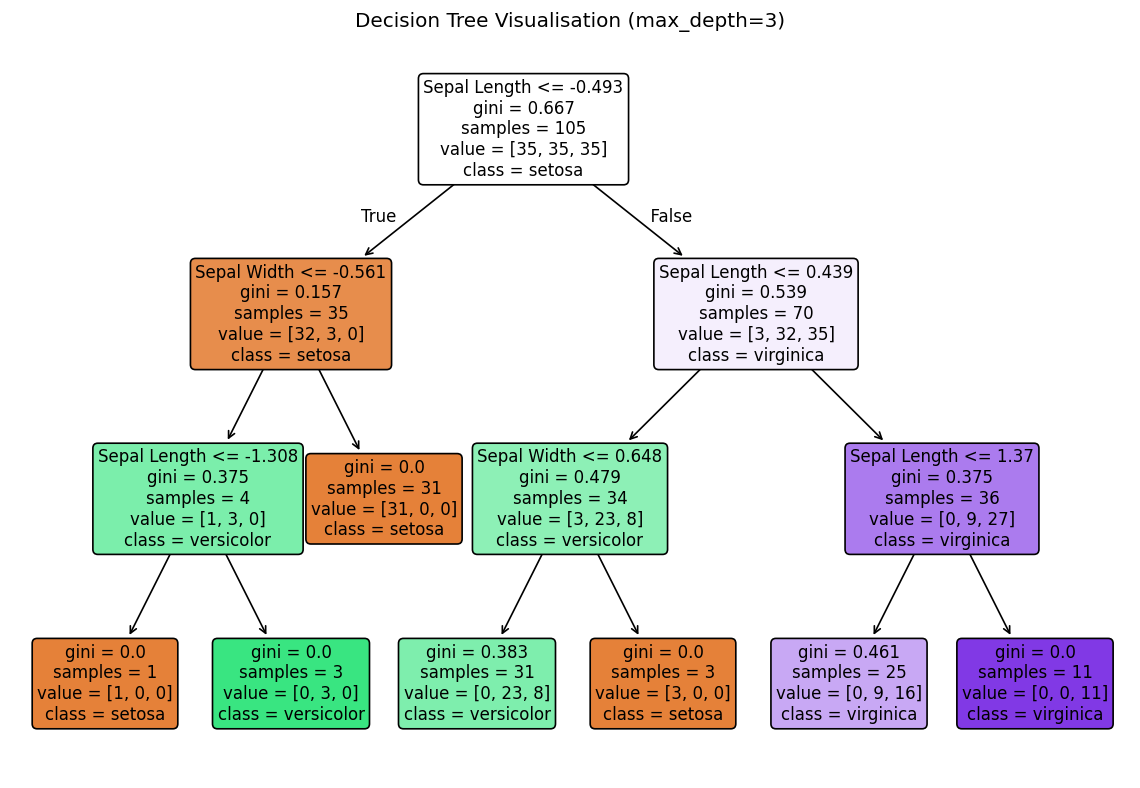

In [5]:
# Visualise the fitted decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    dtree,
    filled=True,
    feature_names=['Sepal Length', 'Sepal Width'],
    class_names=iris.target_names,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualisation (max_depth=3)')
plt.show()


In [6]:
# Display the decision rules in text form
tree_rules = export_text(dtree, feature_names=['sepal length (cm)', 'sepal width (cm)'])
print('Decision Tree Rules:')
print(tree_rules)


Decision Tree Rules:
|--- sepal length (cm) <= -0.49
|   |--- sepal width (cm) <= -0.56
|   |   |--- sepal length (cm) <= -1.31
|   |   |   |--- class: 0
|   |   |--- sepal length (cm) >  -1.31
|   |   |   |--- class: 1
|   |--- sepal width (cm) >  -0.56
|   |   |--- class: 0
|--- sepal length (cm) >  -0.49
|   |--- sepal length (cm) <= 0.44
|   |   |--- sepal width (cm) <= 0.65
|   |   |   |--- class: 1
|   |   |--- sepal width (cm) >  0.65
|   |   |   |--- class: 0
|   |--- sepal length (cm) >  0.44
|   |   |--- sepal length (cm) <= 1.37
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  1.37
|   |   |   |--- class: 2



In [7]:
# Predict the class for a few new samples (still scaled using the earlier scaler)
new_samples = np.array([[5.1, 3.5], [6.2, 2.9], [7.3, 2.8]])
new_samples_scaled = scaler_dt.transform(new_samples)
predicted_classes = dtree.predict(new_samples_scaled)

print('Predicted classes for new samples:', predicted_classes)
print('Class name mapping:', dict(enumerate(iris.target_names)))


Predicted classes for new samples: [0 1 2]
Class name mapping: {0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}


## Linear Regression on the Diabetes Dataset

Regression is about predicting a continuous number. Using the diabetes dataset, we build a simple linear regression model with a single feature (body mass index). This mirrors the first step many practitioners take: start with the most interpretable baseline, then measure error on held-out data and via cross-validation.

In [8]:
# Load the diabetes dataset and select a single informative feature
diabetes = load_diabetes()
X_diabetes = diabetes['data']
y_diabetes = diabetes['target']
X_selected = X_diabetes[:, 2]  # BMI feature

print(f'Selected feature shape: {X_selected.shape}')
print(f'Response vector shape: {y_diabetes.shape}')


Selected feature shape: (442,)
Response vector shape: (442,)


In [9]:
# Train/test split on the selected feature (reshape to 2D for scikit-learn)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_selected.reshape(-1, 1), y_diabetes, test_size=0.2, random_state=42
)

regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)

y_pred_reg = regression_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 4061.83
R-squared (R2): 0.23


In [10]:
# Cross-validation with the same single feature
num_folds = 5
cv_scores = cross_val_score(
    LinearRegression(),
    X_selected.reshape(-1, 1),
    y_diabetes,
    cv=num_folds,
    scoring='neg_mean_squared_error'
)

rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE scores ({num_folds}-fold): {rmse_scores.round(2)}')
print(f'Average RMSE: {rmse_scores.mean():.2f}')


Cross-validated RMSE scores (5-fold): [62.18 63.22 61.82 60.88 64.22]
Average RMSE: 62.46


In [11]:
# Predict the outcome for a new unseen data point
new_data_point = np.array([[0.05]])
predicted_value = regression_model.predict(new_data_point)
print(f'Predicted Value for New Data Point: {predicted_value[0]:.2f}')


Predicted Value for New Data Point: 201.93


## Non-Linear Regression on a Synthetic Curve

Real-world regression problems are often non-linear: a straight line is not enough. We generate a wavy one-dimensional dataset with noise and compare several models. Each subplot shows how the model fits the curve along with its root mean squared error (RMSE) and R-squared score on a held-out test set.

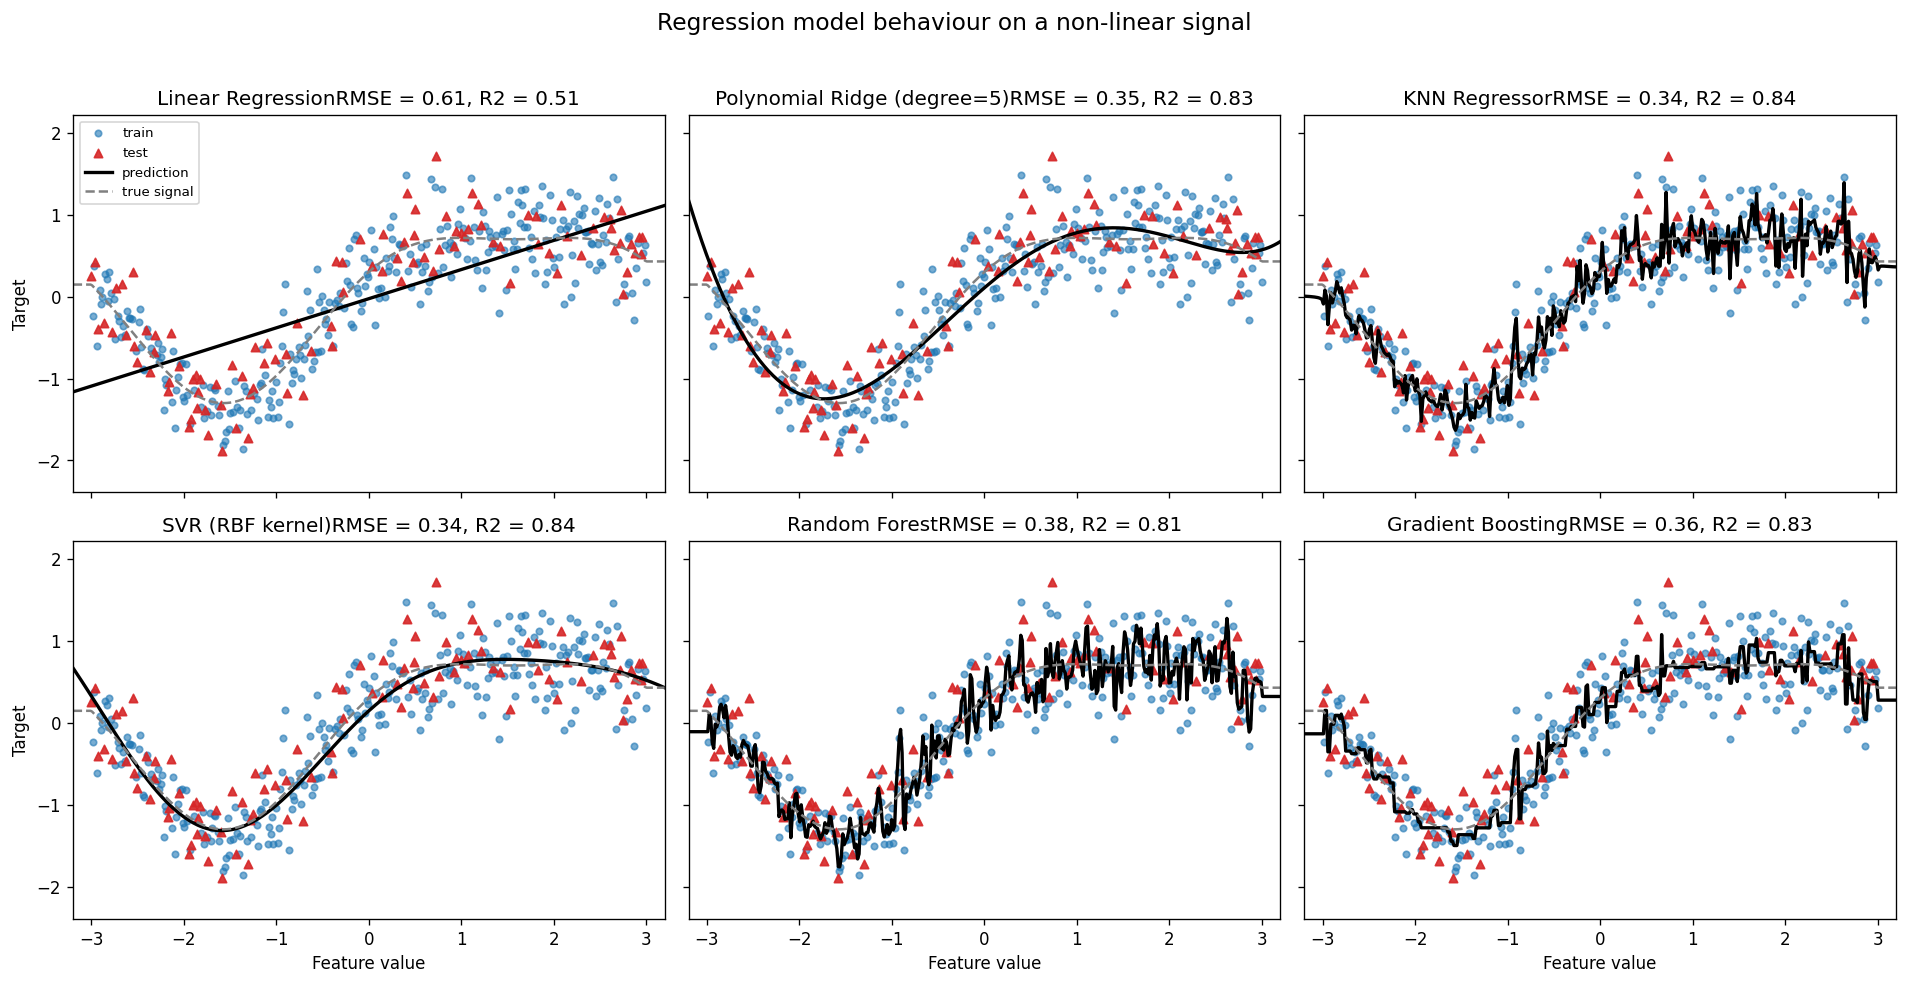

Model comparison (sorted by RMSE):
  SVR (RBF kernel)               RMSE = 0.34 | R2 = 0.84
  KNN Regressor                  RMSE = 0.34 | R2 = 0.84
  Polynomial Ridge (degree=5)    RMSE = 0.35 | R2 = 0.83
  Gradient Boosting              RMSE = 0.36 | R2 = 0.83
  Random Forest                  RMSE = 0.38 | R2 = 0.81
  Linear Regression              RMSE = 0.61 | R2 = 0.51


In [12]:
# Compare regression models on a non-linear synthetic dataset
rng = np.random.default_rng(42)
X_curve = np.linspace(-3, 3, 400)
y_clean = np.sin(X_curve) + 0.3 * np.cos(2 * X_curve)
y_curve = y_clean + rng.normal(scale=0.35, size=X_curve.shape)
X_curve = X_curve.reshape(-1, 1)

X_train_curve, X_test_curve, y_train_curve, y_test_curve = train_test_split(
    X_curve, y_curve, test_size=0.25, random_state=42
)

regressor_configs = [
    ("Linear Regression", make_pipeline(StandardScaler(), LinearRegression())),
    ("Polynomial Ridge (degree=5)", make_pipeline(
        PolynomialFeatures(degree=5, include_bias=False), Ridge(alpha=1.0)
    )),
    ("KNN Regressor", make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=12, weights="distance"))),
    ("SVR (RBF kernel)", make_pipeline(StandardScaler(), SVR(C=10, gamma=0.4, epsilon=0.1))),
    ("Random Forest", RandomForestRegressor(n_estimators=300, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
]

x_dense = np.linspace(X_curve.min() - 0.2, X_curve.max() + 0.2, 400).reshape(-1, 1)
results = []
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True, sharey=True)

for ax, (name, model) in zip(axes.ravel(), regressor_configs):
    model.fit(X_train_curve, y_train_curve)
    y_pred_dense = model.predict(x_dense)
    y_pred_test = model.predict(X_test_curve)
    rmse = np.sqrt(mean_squared_error(y_test_curve, y_pred_test))
    r2 = r2_score(y_test_curve, y_pred_test)
    results.append({"Regressor": name, "RMSE": rmse, "R2": r2})

    ax.scatter(X_train_curve[:, 0], y_train_curve, s=15, alpha=0.6, label="train", color="C0")
    ax.scatter(X_test_curve[:, 0], y_test_curve, s=25, alpha=0.9, label="test", color="C3", marker="^")
    ax.plot(x_dense[:, 0], y_pred_dense, color="black", linewidth=2, label="prediction")
    ax.plot(x_dense[:, 0], np.interp(x_dense[:, 0], X_curve[:, 0], y_clean), color="gray", linestyle="--", label="true signal")
    ax.set_title(f"{name}RMSE = {rmse:.2f}, R2 = {r2:.2f}")
    ax.set_xlim(X_curve.min() - 0.2, X_curve.max() + 0.2)
    ax.set_ylim(y_curve.min() - 0.5, y_curve.max() + 0.5)
    if ax is axes[0, 0]:
        ax.legend(loc="upper left", fontsize=8)

for ax in axes[-1]:
    ax.set_xlabel("Feature value")
for row in axes:
    row[0].set_ylabel("Target")

fig.suptitle("Regression model behaviour on a non-linear signal", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

results_sorted = sorted(results, key=lambda row: row["RMSE"])
print("Model comparison (sorted by RMSE):")
for row in results_sorted:
    print(f"  {row['Regressor']:<30s} RMSE = {row['RMSE']:.2f} | R2 = {row['R2']:.2f}")


## K-Nearest Neighbours Classification

K-Nearest Neighbours (KNN) is a non-parametric algorithm: to classify a new point, it looks at the labels of the closest training examples. We reuse the scaled Iris data so that distance-based comparisons make sense, and we evaluate how well a modest neighbourhood size performs.

In [13]:
# Fit and evaluate a KNN classifier (reusing the scaled Iris train/test splits)
k = 5
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train_dt, y_train_dt)
knn_predictions = knn_clf.predict(X_test_dt)
knn_accuracy = accuracy_score(y_test_dt, knn_predictions)
print(f'KNN Accuracy on Test Set (k={k}): {knn_accuracy:.2f}')


KNN Accuracy on Test Set (k=5): 0.69


## Visualising Decision Boundaries Across Classifiers

To build intuition, we now compare several popular classifiers on challenging synthetic datasets. Each row shows the same data (training points as circles and test points as triangles) while each column applies a different algorithm. The colourful background reveals the regions where each model predicts class 0 or class 1. Notice how linear models produce straight boundaries, while tree-based and kernel methods bend to follow the data.

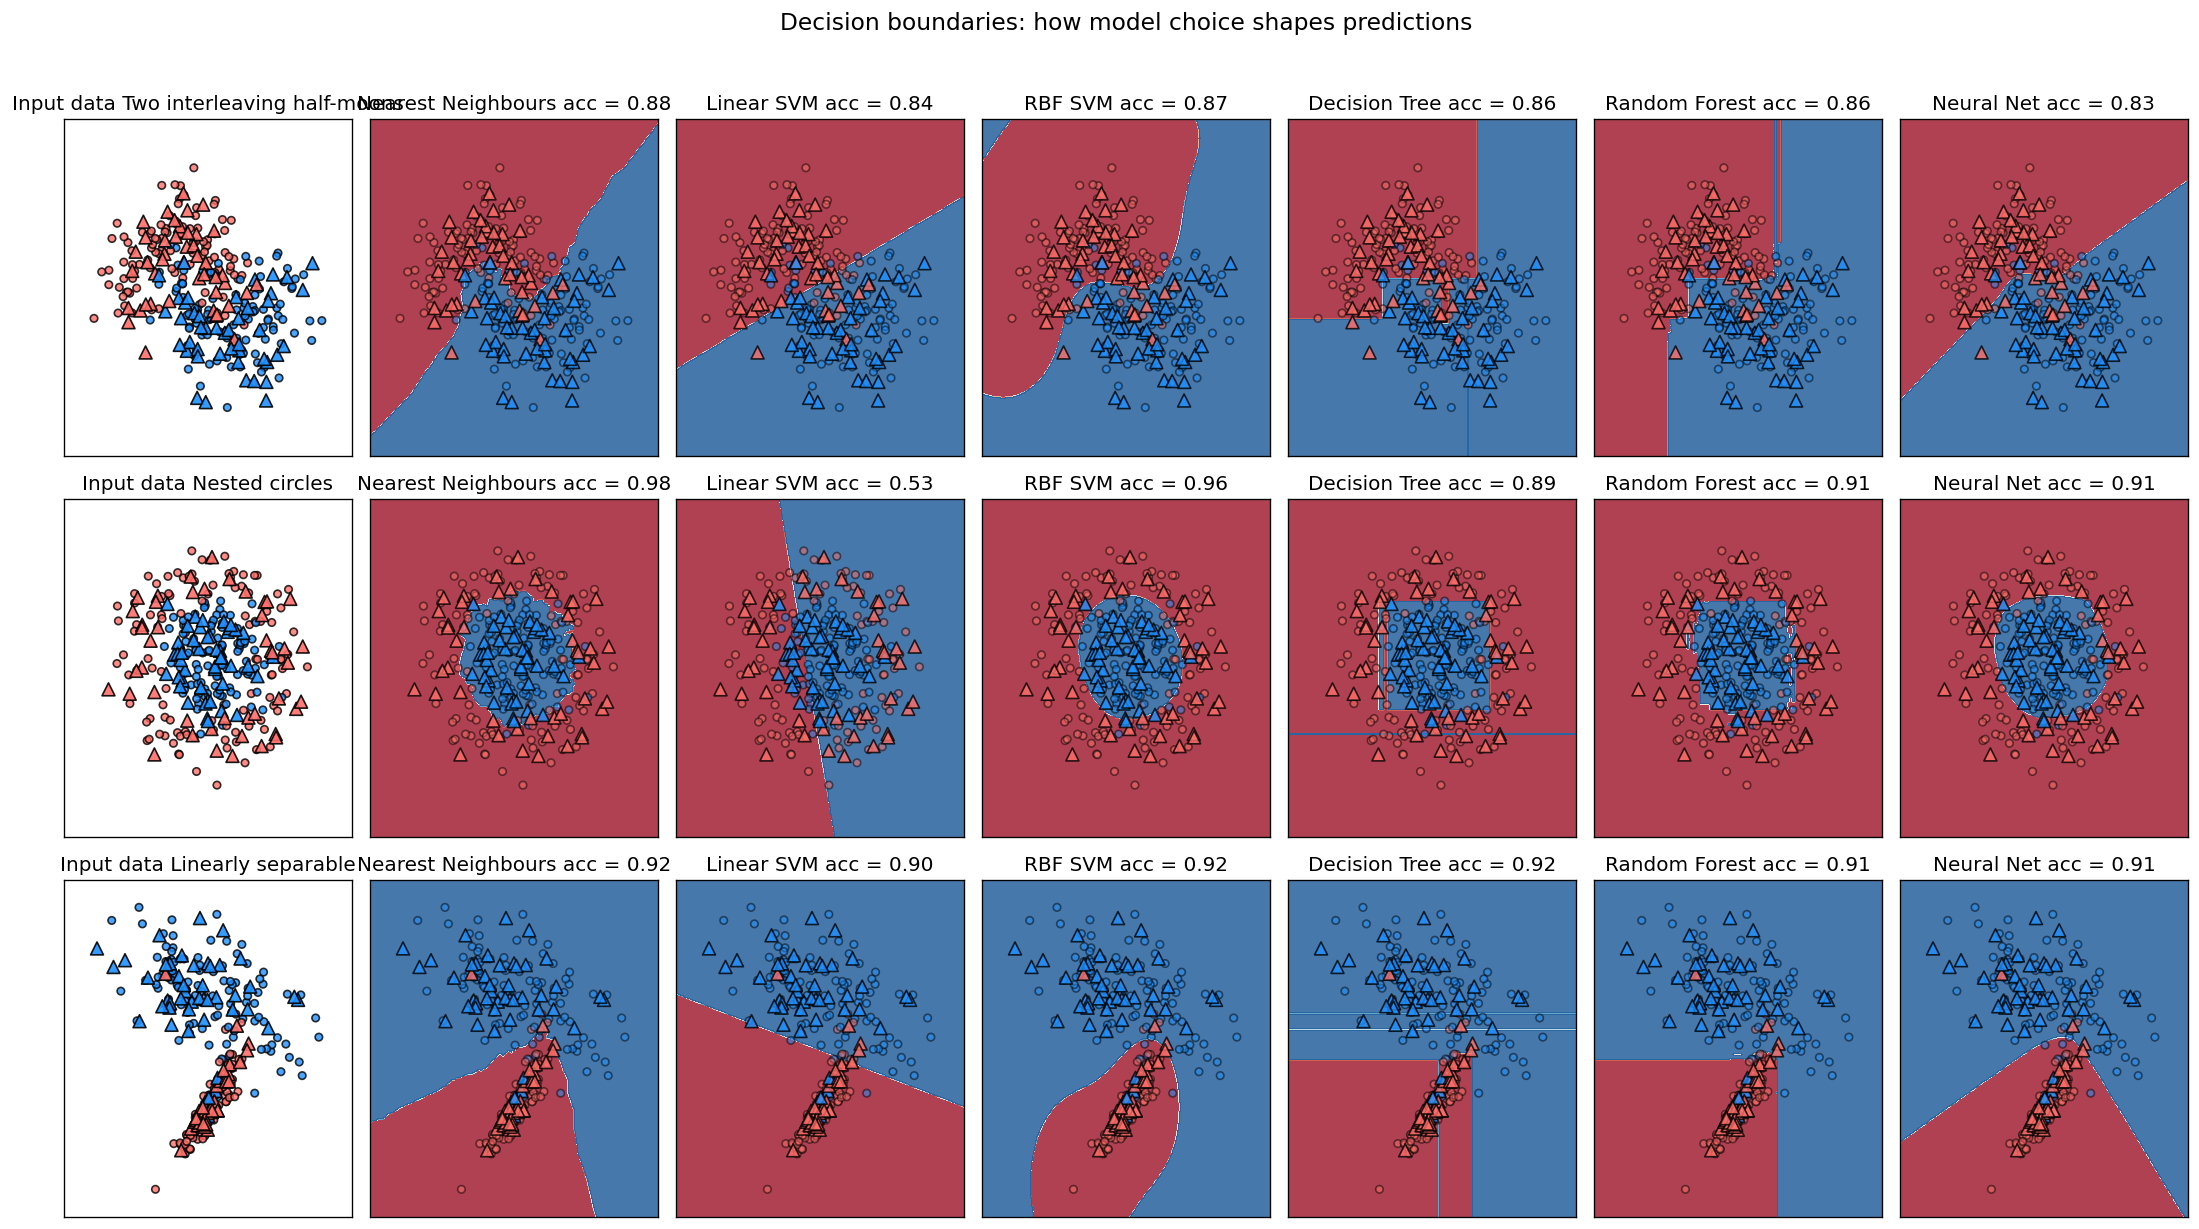

In [18]:
# Compare multiple classifiers on synthetic datasets
classification_datasets = [
    ("Two interleaving half-moons", *make_moons(n_samples=300, noise=0.3, random_state=42)),
    ("Nested circles", *make_circles(n_samples=300, noise=0.2, factor=0.4, random_state=42)),
    ("Linearly separable", *make_classification(
        n_samples=300, n_features=2, n_redundant=0, n_informative=2,
        n_clusters_per_class=1, flip_y=0.03, class_sep=1.2, random_state=42
    )),
]

classifier_configs = [
    ("Nearest Neighbours", KNeighborsClassifier(n_neighbors=15)),
    ("Linear SVM", SVC(kernel="linear", C=1.0, random_state=42)),
    ("RBF SVM", SVC(kernel="rbf", C=1.0, gamma=0.5, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)),
    ("Neural Net", MLPClassifier(hidden_layer_sizes=(50, 50), alpha=0.0001, max_iter=2000, random_state=42)),
]

fig, axes = plt.subplots(len(classification_datasets), len(classifier_configs) + 1, figsize=(18, 10))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF6F69", "#1E90FF"])

for row_idx, (title, X, y) in enumerate(classification_datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    x_min, x_max = X[:, 0].min() - 0.6, X[:, 0].max() + 0.6
    y_min, y_max = X[:, 1].min() - 0.6, X[:, 1].max() + 0.6
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    ax_data = axes[row_idx, 0]
    ax_data.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolor="k", s=20, alpha=0.8)
    ax_data.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolor="k", s=60, marker="^", alpha=0.9)
    ax_data.set_title(f"Input data {title}")
    ax_data.set_xticks([])
    ax_data.set_yticks([])
    ax_data.set_xlim(x_min, x_max)
    ax_data.set_ylim(y_min, y_max)

    for col_idx, (name, estimator) in enumerate(classifier_configs, start=1):
        model = make_pipeline(StandardScaler(), estimator)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax = axes[row_idx, col_idx]
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolor="k", s=20, alpha=0.5)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolor="k", s=60, marker="^", alpha=0.8)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_title(f"{name} acc = {score:.2f}")

fig.suptitle("Decision boundaries: how model choice shapes predictions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


## K-Means Clustering on Synthetic Data

Not all machine learning is supervised. K-Means tries to uncover structure without labels by grouping data points into clusters. By generating a toy dataset with three blobs we can visually inspect how the algorithm assigns cluster IDs and where it places the centroid of each group.

In [19]:
# Generate synthetic blob data with three distinct clusters
X_blobs, y_blobs = make_blobs(
    n_samples=300, centers=3, cluster_std=3, random_state=42
)

print(f'Synthetic feature matrix shape: {X_blobs.shape}')


Synthetic feature matrix shape: (300, 2)


In [20]:
# Fit K-Means and inspect the resulting clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_blobs)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print('Cluster centres:', cluster_centers)


Cluster centres: [[-2.73086962  9.13290296]
 [ 5.06171523  1.77585276]
 [-7.03009751 -7.22361461]]


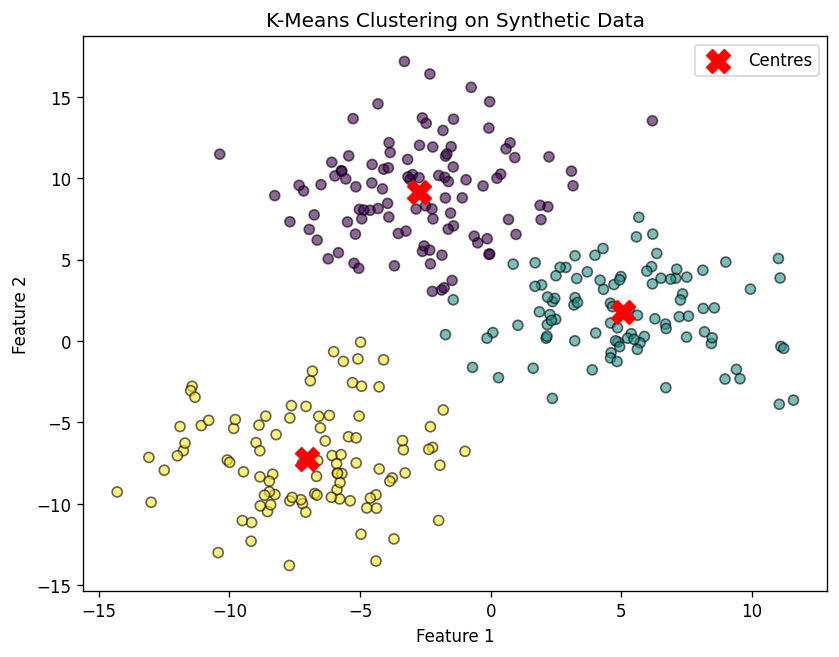

In [21]:
# Visualise the clusters and their centres
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, edgecolor='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centres')
plt.title('K-Means Clustering on Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Comparing Logistic Regression and SVM with a Paired t-test

Once you have more than one candidate model, statistical tests can help determine whether the observed performance difference is meaningful or due to random variation across cross-validation folds. Here we compare logistic regression with an SVM on the full Iris dataset, then run a paired t-test on their fold-level accuracy scores.

In [22]:
# Prepare the full Iris feature set
X_full = iris.data
y_full = iris.target

model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))
model_svm = make_pipeline(StandardScaler(), SVC(random_state=42))

cv_scores_lr = cross_val_score(model_lr, X_full, y_full, cv=5)
cv_scores_svm = cross_val_score(model_svm, X_full, y_full, cv=5)

print('Logistic Regression CV scores:', cv_scores_lr.round(2))
print('SVM CV scores:', cv_scores_svm.round(2))


Logistic Regression CV scores: [0.97 1.   0.93 0.9  1.  ]
SVM CV scores: [0.97 0.97 0.97 0.93 1.  ]


In [23]:
# Paired t-test to compare the CV score distributions
t_stat, p_value = ttest_rel(cv_scores_lr, cv_scores_svm)
print(f't-statistic: {t_stat:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < 0.05:
    print('The performance difference is statistically significant at the 5% level.')
else:
    print('No statistically significant difference detected at the 5% level.')


t-statistic: -0.53
p-value: 0.6213
No statistically significant difference detected at the 5% level.


## Where to Go Next

You now have a tour of fundamental modelling patterns: decision trees, distance-based methods, margin maximisers, ensembles, neural networks, and clustering. As practice, try tuning hyperparameters (e.g. tree depth, learning rate, regularisation strength) or swap in different evaluation metrics that better match your problem. The scikit-learn user guide provides short code snippets for most ideas you see here—perfect references for experimentation.